<a href="https://colab.research.google.com/github/Kavitha1562/Codsoft/blob/main/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data=pd.read_csv("/content/Titanic-Dataset.csv")
print(data.head())
print("Descirbing data\n",data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
De

In [3]:
# Data preprocessing
# Fill missing values for 'Age' with the median and 'Embarked' with the mode
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Convert categorical variables to numerical values
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Select features and target variable
features = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
target = data['Survived']


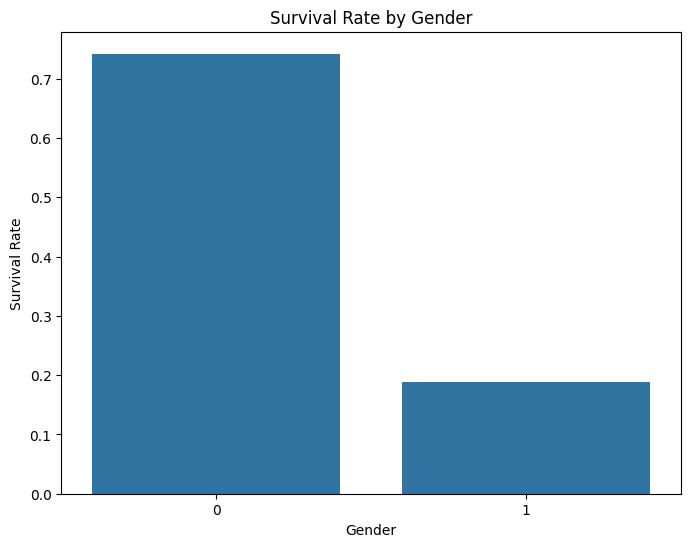

In [4]:
# Data visualization - Survival Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=data, errorbar=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()


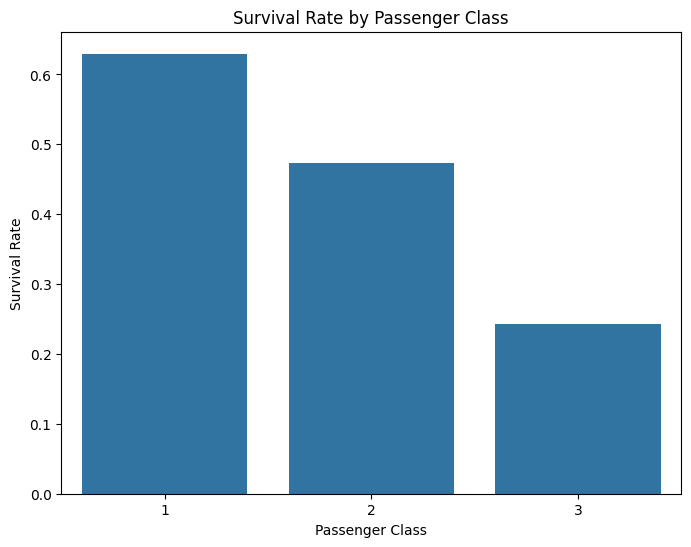

In [5]:
# Data visualization - Survival Rate by Class (Pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=data, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [9]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Build the model using Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.80
Confusion Matrix:
[[89 16]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [12]:
# Function to predict survival based on user input
def predict_survival():
    # User input for passenger details
    pclass = int(input("Enter Passenger Class (1, 2, or 3): "))
    sex = input("Enter Sex (male or female): ").lower()
    age = float(input("Enter Age: "))
    sibsp = int(input("Enter Number of Siblings/Spouses Aboard: "))
    parch = int(input("Enter Number of Parents/Children Aboard: "))
    fare = float(input("Enter Fare: "))

    # Encode sex
    sex_encoded = 1 if sex == 'female' else 0

    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [sex_encoded],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare]
    })

    # Scale the input data using the same scaler used for training
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_scaled)

    # Output the prediction result
    if prediction[0] == 1:
        print("The passenger is predicted to have survived.")
    else:
        print("The passenger is predicted not to have survived.")

# Call the function to get predictions
predict_survival()


Enter Passenger Class (1, 2, or 3): 1
Enter Sex (male or female): male
Enter Age: 18
Enter Number of Siblings/Spouses Aboard: 2
Enter Number of Parents/Children Aboard: 3
Enter Fare: 200
The passenger is predicted to have survived.


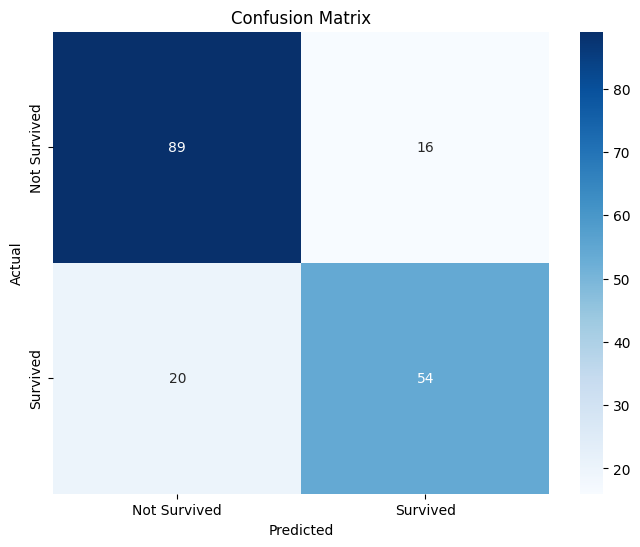

In [13]:
# Data visualization - Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
